#### Single point walkthough; pick the first point alphabetically

In [1]:
import os
os.chdir('../scripts/')
import explore_training
import netCDF4 as nc

In [2]:
reload(explore_training)
train_data, loc_data = explore_training.create_training_data('../data/kaggle_solar')

In [3]:
one_point = train_data[train_data['location'] == 'ACME']

In [4]:
loc_data = loc_data.loc['ACME',:]

In [5]:
loc_data

nlat     34.80833
elon    -98.02325
elev    397.00000
Name: ACME, dtype: float64

#### Loop over file names and extract values at relevant lat, lon, average

In [6]:
files_to_use = ['dswrf_sfc','dlwrf_sfc','uswrf_sfc','ulwrf_sfc',
                'ulwrf_tatm','pwat_eatm','tcdc_eatm','apcp_sfc','pres_msl',
                'spfh_2m','tcolc_eatm','tmax_2m','tmin_2m','tmp_2m','tmp_sfc']
train_sub_str = '_latlon_subset_19940101_20071231.nc'


In [7]:
nc.Dataset('../data/kaggle_solar/train/dswrf_sfc_latlon_subset_19940101_20071231.nc','r')

<type 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format UNDEFINED):
    Conventions: CF-1.0
    title: Subset of data from 2nd-generation multi-decadal ensemble reforecast generated from the NCEP Global Ensemble Forecast System, mimicking version operational at NCEP/EMC circa mid-2012.
    institution: NOAA Earth System Research Laboratory (ESRL)
    source: NCEP GFS v 9.01, T254L42.  Control initial conditions from CFSRR.  Perturbed initial conditions from ETR.  Model error simulated with STTP.
    references: http://www.esrl.noaa.gov/psd/forecasts/reforecast2/index.html
    history: Subset created 2013-01-15 19:19:01 UTC
    comment: Original dataset generated on DOE's supercomputers at Lawrence Berkeley Laboratory through ALCC/ASCR grant.
    dimensions(sizes): time(5113), lat(9), lon(16), ens(11), fhour(5)
    variables(dimensions): float64 time(time), int32 intTime(time), float32 lat(lat), float32 lon(lon), int16 ens(ens), int32 fhour(fhour), int32 intValidTi

In [8]:
import numpy as np
import pandas as pd

In [9]:
for i, iter_file in enumerate(files_to_use):
    if (i == 0):
        print('../data/kaggle_solar/train/' + iter_file + train_sub_str)
        nc_file = nc.Dataset('../data/kaggle_solar/train/' + iter_file + train_sub_str, 'r')
        X = nc_file.variables.values()[-1][:,:,:,3:5,7:9]
        X = np.mean(X,axis=1)
        X = np.reshape(X,-1)
    else:
        print('../data/kaggle_solar/train/' + iter_file + train_sub_str)
        nc_file = nc.Dataset('../data/kaggle_solar/train/' + iter_file + train_sub_str, 'r+')
        X_new = nc_file.variables.values()[-1][:,:,:,3:5,7:9]
        X_new = np.mean(X_new,axis=1)
        X_new = np.reshape(X_new,-1)
        if (i == 1):
            X = np.hstack((X[:,None],X_new[:,None]))
        else:
            X = np.hstack((X,X_new[:,None]))


../data/kaggle_solar/train/dswrf_sfc_latlon_subset_19940101_20071231.nc
../data/kaggle_solar/train/dlwrf_sfc_latlon_subset_19940101_20071231.nc
../data/kaggle_solar/train/uswrf_sfc_latlon_subset_19940101_20071231.nc
../data/kaggle_solar/train/ulwrf_sfc_latlon_subset_19940101_20071231.nc
../data/kaggle_solar/train/ulwrf_tatm_latlon_subset_19940101_20071231.nc
../data/kaggle_solar/train/pwat_eatm_latlon_subset_19940101_20071231.nc
../data/kaggle_solar/train/tcdc_eatm_latlon_subset_19940101_20071231.nc
../data/kaggle_solar/train/apcp_sfc_latlon_subset_19940101_20071231.nc
../data/kaggle_solar/train/pres_msl_latlon_subset_19940101_20071231.nc
../data/kaggle_solar/train/spfh_2m_latlon_subset_19940101_20071231.nc
../data/kaggle_solar/train/tcolc_eatm_latlon_subset_19940101_20071231.nc
../data/kaggle_solar/train/tmax_2m_latlon_subset_19940101_20071231.nc
../data/kaggle_solar/train/tmin_2m_latlon_subset_19940101_20071231.nc
../data/kaggle_solar/train/tmp_2m_latlon_subset_19940101_20071231.nc
.

In [10]:
X.shape

(102260, 15)

In [11]:
single_df = pd.DataFrame(X)

In [12]:
#single_df

In [13]:
data = nc.Dataset('../data/kaggle_solar/train/dswrf_sfc_latlon_subset_19940101_20071231.nc')
import datetime
values = data.variables.values()
times = [datetime.time(val%24) for val in values[5][:]]
dates = [datetime.datetime.strptime(str(val), "%Y%m%d%H") for val in values[1][:]]
lats = [int(val) for val in values[2][3:5]]
lons = [int(val) for val in values[3][7:9]]
import itertools
new_indices = list(itertools.product(dates, times, lats, lons))

In [14]:
indices = np.asarray(new_indices)

In [15]:
single_array = np.hstack((indices,X))

In [16]:
single_df = pd.DataFrame(single_array)

In [17]:
df_columns = ['date','time','lat','lon'] + files_to_use

In [18]:
single_df.columns = df_columns

In [19]:
single_df

,date,time,lat,lon,dswrf_sfc,dlwrf_sfc,uswrf_sfc,ulwrf_sfc,ulwrf_tatm,pwat_eatm,tcdc_eatm,apcp_sfc,pres_msl,spfh_2m,tcolc_eatm,tmax_2m,tmin_2m,tmp_2m,tmp_sfc
0,1994-01-01 00:00:00,12:00:00,34,261,0,261.584,0,348.759,253.517,5.91556,0.00363636,0,101998,0.0025781,0.00345455,283.59,280.757,280.795,278.96
1,1994-01-01 00:00:00,12:00:00,34,262,0,269.947,0,347.031,240.88,6.14283,0,0,101895,0.00360719,0.000118182,282.926,279.913,280.277,278.524
2,1994-01-01 00:00:00,12:00:00,35,261,0,250.765,0,342.486,251.426,6.52465,0,0,102056,0.00253447,0.000172727,281.599,278.912,278.958,277.197
3,1994-01-01 00:00:00,12:00:00,35,262,0,256.493,0,341.759,244.426,5.9701,0.00363636,0,101943,0.00244265,0.00278182,281.426,279.424,279.44,277.642
4,1994-01-01 00:00:00,15:00:00,34,261,30,246.878,9,340.341,252.686,6.89091,0,0,102222,0.00285456,0.00210909,280.709,279.28,280.412,280.15
5,1994-01-01 00:00:00,15:00:00,34,262,30,246.787,10,340.341,254.777,6.23636,0,0,102130,0.00290911,4.54545e-05,280.546,279.34,280.503,280.296
6,1994-01-01 00:00:00,15:00:00,35,261,30,244.423,8,332.977,247.777,7.62727,0,0,102236,0.00317184,0.000390909,279.246,277.766,279.23,278.896
7,1994-01-01 00:00:00,15:00:00,35,262,30,244.696,9,335.25,250.686,7.45455,0,0,102150,0.00318184,0.00228182,279.427,278.188,279.403,279.169
8,1994-01-01 00:00:00,18:00:00,34,261,220,253.72,51,362.081,255.578,8.51534,0,0,102239,0.00360651,0.000727273,287.046,279.28,287.07,291.745
9,1994-01-01 00:00:00,18:00:00,34,262,220.909,253.356,51,361.262,257.306,8.27898,0,0,102166,0.0036956,0.000381818,287.51,279.341,287.516,291.063


In [20]:
[type(val) for val in single_df.iloc[0,:]]

[datetime.datetime,
 datetime.time,
 int,
 int,
 float,
 float,
 float,
 float,
 float,
 float,
 float,
 float,
 float,
 float,
 float,
 float,
 float,
 float,
 float]

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
one_point.head()

,location,total_solar
date,,
1994-01-01,ACME,12384900
1994-01-02,ACME,11908500
1994-01-03,ACME,12470700
1994-01-04,ACME,12725400
1994-01-05,ACME,10894800


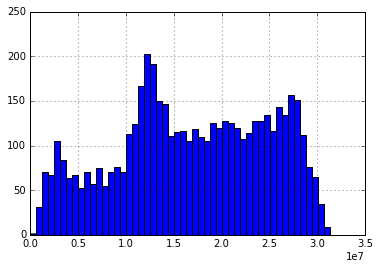

In [23]:
one_point['total_solar'].hist(bins=50)

In [24]:
plt.rcParams['figure.figsize'] = (12, 8)

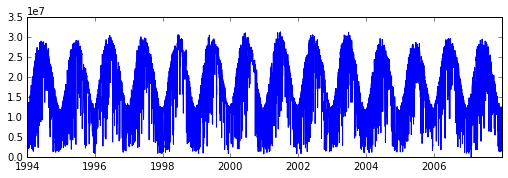

In [25]:
plt.rcParams['figure.figsize'] = (8.5, 2.5)
plt.plot(one_point['total_solar'])
plt.savefig('total_time.png')

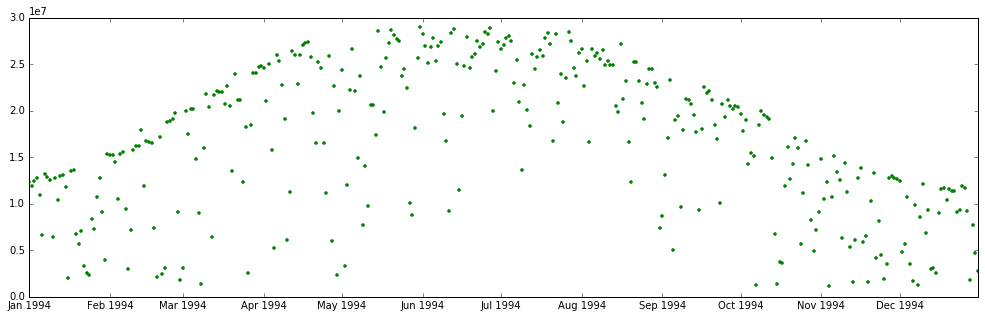

In [26]:
plt.rcParams['figure.figsize'] = (17, 5)
plt.plot(one_point.ix[0:365,'total_solar'], 'g.')
plt.savefig('one_year.png')

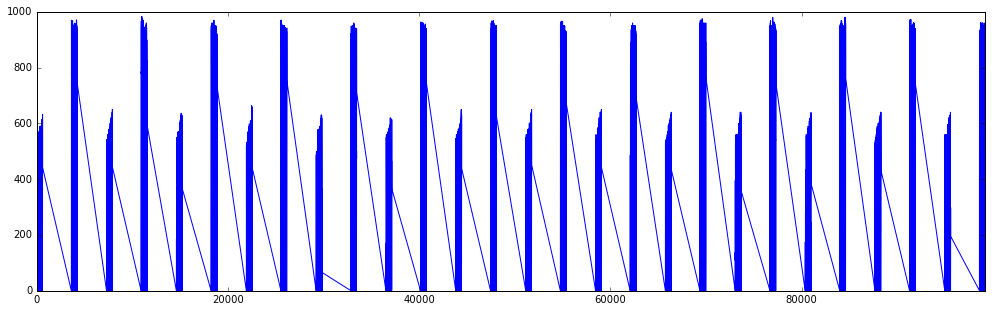

In [27]:
single_df[((single_df.date.dt.month == 1) | (single_df.date.dt.month == 7))]['dswrf_sfc'].plot()

In [28]:
single_df.head()

,date,time,lat,lon,dswrf_sfc,dlwrf_sfc,uswrf_sfc,ulwrf_sfc,ulwrf_tatm,pwat_eatm,tcdc_eatm,apcp_sfc,pres_msl,spfh_2m,tcolc_eatm,tmax_2m,tmin_2m,tmp_2m,tmp_sfc
0,1994-01-01 00:00:00,12:00:00,34,261,0,261.584,0,348.759,253.517,5.91556,0.00363636,0,101998,0.0025781,0.00345455,283.59,280.757,280.795,278.96
1,1994-01-01 00:00:00,12:00:00,34,262,0,269.947,0,347.031,240.88,6.14283,0,0,101895,0.00360719,0.000118182,282.926,279.913,280.277,278.524
2,1994-01-01 00:00:00,12:00:00,35,261,0,250.765,0,342.486,251.426,6.52465,0,0,102056,0.00253447,0.000172727,281.599,278.912,278.958,277.197
3,1994-01-01 00:00:00,12:00:00,35,262,0,256.493,0,341.759,244.426,5.9701,0.00363636,0,101943,0.00244265,0.00278182,281.426,279.424,279.44,277.642
4,1994-01-01 00:00:00,15:00:00,34,261,30,246.878,9,340.341,252.686,6.89091,0,0,102222,0.00285456,0.00210909,280.709,279.28,280.412,280.15


In [29]:
one_12_34_261 = single_df[(single_df['time'] == datetime.time(12,0)) & (single_df['lat'] == 34) & (single_df['lon'] == 261)].iloc[:,5:].astype('float').reset_index()
out = one_point['total_solar'].astype('float').reset_index()['total_solar']
one_12_34_261.drop('index',axis=1,inplace=True)
all_vars_12_34_261 = one_12_34_261.merge(pd.DataFrame(out),left_index=True,right_index=True)

In [30]:
one_15_34_261 = single_df[(single_df['time'] == datetime.time(15,0)) & (single_df['lat'] == 34) & (single_df['lon'] == 261)].iloc[:,5:].astype('float').reset_index()
out = one_point['total_solar'].astype('float').reset_index()['total_solar']
one_15_34_261.drop('index',axis=1,inplace=True)
all_vars_15_34_261 = one_15_34_261.merge(pd.DataFrame(out),left_index=True,right_index=True)

In [31]:
one_18_34_261 = single_df[(single_df['time'] == datetime.time(18,0)) & (single_df['lat'] == 34) & (single_df['lon'] == 261)].iloc[:,5:].astype('float').reset_index()
out = one_point['total_solar'].astype('float').reset_index()['total_solar']
one_18_34_261.drop('index',axis=1,inplace=True)
all_vars_18_34_261 = one_18_34_261.merge(pd.DataFrame(out),left_index=True,right_index=True)

In [32]:
one_21_34_261 = single_df[(single_df['time'] == datetime.time(21,0)) & (single_df['lat'] == 34) & (single_df['lon'] == 261)].iloc[:,5:].astype('float').reset_index()
out = one_point['total_solar'].astype('float').reset_index()['total_solar']
one_21_34_261.drop('index',axis=1,inplace=True)
all_vars_21_34_261 = one_21_34_261.merge(pd.DataFrame(out),left_index=True,right_index=True)

In [33]:
one_0_34_261 = single_df[(single_df['time'] == datetime.time(0,0)) & (single_df['lat'] == 34) & (single_df['lon'] == 261)].iloc[:,5:].astype('float').reset_index()
out = one_point['total_solar'].astype('float').reset_index()['total_solar']
one_0_34_261.drop('index',axis=1,inplace=True)
all_vars_0_34_261 = one_0_34_261.merge(pd.DataFrame(out),left_index=True,right_index=True)

In [34]:
all_vars_0_34_261.corr()

,dlwrf_sfc,uswrf_sfc,ulwrf_sfc,ulwrf_tatm,pwat_eatm,tcdc_eatm,apcp_sfc,pres_msl,spfh_2m,tcolc_eatm,tmax_2m,tmin_2m,tmp_2m,tmp_sfc,total_solar
dlwrf_sfc,1.000000,0.351463,0.888581,0.280600,0.916876,0.089255,0.142320,-0.556513,0.915496,0.089441,0.890019,0.914558,0.915669,0.928082,0.445430
uswrf_sfc,0.351463,1.000000,0.643269,0.683439,0.230264,-0.452252,-0.307532,-0.277136,0.354989,-0.451713,0.588249,0.594994,0.601505,0.601785,0.795793
ulwrf_sfc,0.888581,0.643269,1.000000,0.576645,0.729626,-0.167166,-0.076003,-0.575466,0.777302,-0.166798,0.983926,0.986024,0.984420,0.980723,0.695016
ulwrf_tatm,0.280600,0.683439,0.576645,1.000000,0.095653,-0.593812,-0.394149,-0.272085,0.233517,-0.593133,0.552917,0.527208,0.524086,0.503311,0.616104
pwat_eatm,0.916876,0.230264,0.729626,0.095653,1.000000,0.200128,0.262667,-0.407192,0.910311,0.200220,0.722417,0.755602,0.758182,0.780063,0.290646
tcdc_eatm,0.089255,-0.452252,-0.167166,-0.593812,0.200128,1.000000,0.595321,0.022656,0.082570,0.999970,-0.143751,-0.122474,-0.124344,-0.103671,-0.310190
apcp_sfc,0.142320,-0.307532,-0.076003,-0.394149,0.262667,0.595321,1.000000,-0.054642,0.211373,0.595511,-0.045657,-0.030862,-0.031709,-0.015670,-0.264447
pres_msl,-0.556513,-0.277136,-0.575466,-0.272085,-0.407192,0.022656,-0.054642,1.000000,-0.534211,0.022412,-0.644513,-0.627296,-0.636336,-0.616039,-0.271945
spfh_2m,0.915496,0.354989,0.777302,0.233517,0.910311,0.082570,0.211373,-0.534211,1.000000,0.082747,0.796147,0.818684,0.823895,0.836077,0.394345
tcolc_eatm,0.089441,-0.451713,-0.166798,-0.593133,0.200220,0.999970,0.595511,0.022412,0.082747,1.000000,-0.143407,-0.122116,-0.123993,-0.103324,-0.309715


/Users/Joel/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


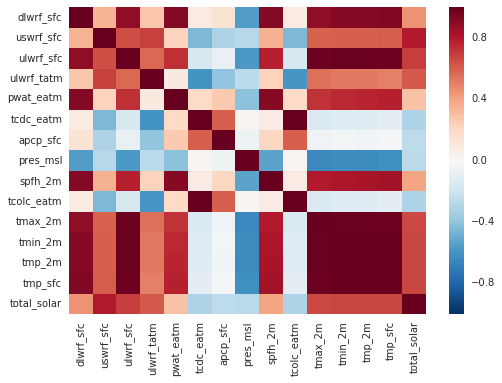

In [35]:
import seaborn as sns
sns.heatmap(all_vars_0_34_261.corr())

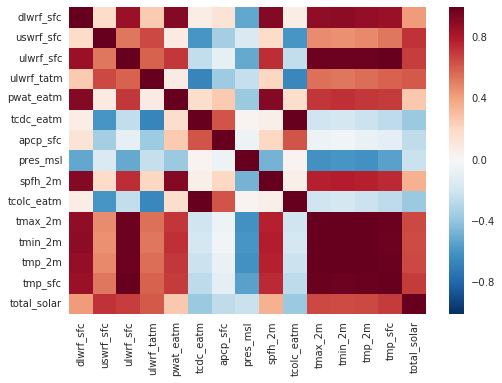

In [36]:
heatmap = sns.heatmap(all_vars_21_34_261.corr())

In [37]:
heatmap_fig = heatmap.get_figure()

In [38]:
heatmap_fig.savefig('heatmap.png')

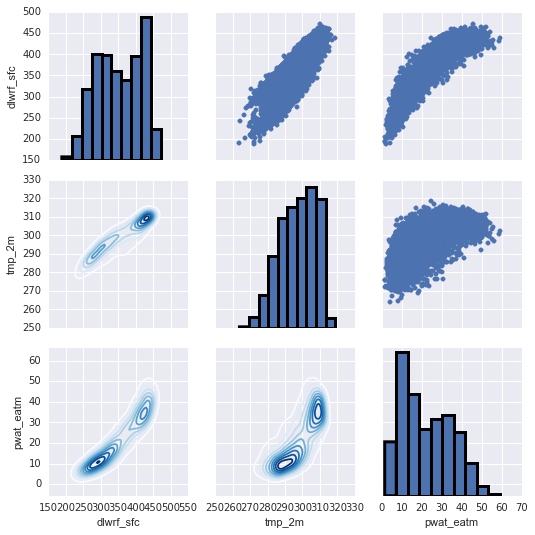

In [41]:
myGraphic = sns.PairGrid(all_vars_21_34_261[["dlwrf_sfc","tmp_2m","pwat_eatm"]], diag_sharey=False)
myGraphic.map_lower(sns.kdeplot, cmap="Blues")
myGraphic.map_upper(plt.scatter)
myGraphic.map_diag(plt.hist, lw=3)

In [42]:
grid_plot = myGraphic.get_figure()

AttributeError: 'PairGrid' object has no attribute 'get_figure'

In [43]:
myGraphic.savefig("grid_fig.png")